**从0开始学习用TF2.0搭建神经网络系列--1** 

本章内容：

1.   如何加载数据集
2.   如何搭建神经网络（Keras API）
3.   设置训练策略（优化器，损失函数， CallBack，保存权重等）
4.   GrandientTape 梯度带的使用









In [1]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

**使用scipy的loadmat函数去读取mat格式的文件**

In [3]:
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

**因为已经预先划分好了x，y以及训练和测试集，所以可以直接使用**

In [4]:
x_train = train['X']
x_test = test['X']
y_train = train['y']
y_test = test['y']
y_train = np.where(y_train==10, 0, y_train)
y_test = np.where(y_test==10, 0, y_test)
x_train = np.moveaxis(x_train, -1, 0)
x_test = np.moveaxis(x_test, -1, 0)

**TensorFlow使用data类去对数据切片和传递数据到模型内**


*   from_trnsor_slices切片数据
*   shuffle函数打乱数据，batch则确定训练时候的batchsize



In [5]:
train_data= tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(buffer_size=1024).batch(64)

In [6]:
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data=test_data.batch(64)

**使用sequential来搭建模型（之后会介绍其他的搭建方法）**
输入的图片大小是训练集的单个图片大小
因为最后是一个十分类问题（0-9分类），所以最后一层全连接是10
最后使用summary再打印模型细节参数

In [7]:
model = tf.keras.Sequential([

    Conv2D(128, 3, padding='valid',input_shape=x_train[0].shape),
    MaxPooling2D(pool_size=2,strides=1, padding='valid'),
    Conv2D(64,3,padding='valid'),
    MaxPooling2D(pool_size=2,strides=1, padding='valid'),
    Conv2D(32, 3, padding='valid'),
    MaxPooling2D(pool_size=2,strides=1, padding='valid'),
    Flatten(),
    Dense(128),
    Dense(64),
    Dense(10)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

**将模型保存到ckpt_path这个文件， save_best_only意为是否保存最好的模型，save_weight_only意为是否只保存权重还是保存模型信息，save_freq是保存的频率，monitor和mode定义了什么是最好的模型**

In [13]:
ckpt_path = 'ckpt'
cp = ModelCheckpoint(ckpt_path,
           save_best_only=True,
           save_weights_only=True,
           save_freq='epoch',
           monitor='loss',
           mode='min')

**设定模型什么时候停下**

In [14]:
EarlyStop = EarlyStopping(monitor='loss', mode='min', patience=3)

**编译模型，其中定义了优化器，损失函数和metrics**

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_data, epochs=10, batch_size=64,
                        verbose=1, validation_split=0, callbacks=[cp, EarlyStop])

Epoch 1/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 2/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 3/10
1145/1145 [==============================] - 13s 11ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 4/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 5/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 6/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 7/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689
Epoch 8/10
1145/1145 [==============================] - 9s 8ms/step - loss: 9.5016 - accuracy: 0.0689


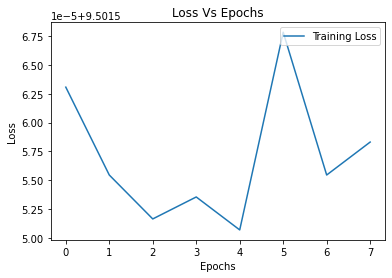

In [18]:
plt.plot(history.history['loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss'], loc='upper right')
plt.show()